# Think Bayes

Second Edition

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
# If we're running on Colab, install empiricaldist
# https://pypi.org/project/empiricaldist/

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from empiricaldist import Pmf
from utils import decorate

## The Beta distribution

The Beta distribution is a conjugate prior for the binomial likelihood function, which means that if you start with a Beta distribution and update with a binomial likelihood, the posterior is also Beta.

Also, given the parameters of the prior and the data, we can compute the parameters of the posterior directly.  The following class represents a Beta distribution and provides a constant-time Update method.

In [23]:
import scipy.stats

class Beta:
    """Represents a Beta distribution.

    See http://en.wikipedia.org/wiki/Beta_distribution
    """
    def __init__(self, alpha=1, beta=1):
        """Initializes a Beta distribution."""
        self.alpha = alpha
        self.beta = beta

    def update(self, data):
        """Updates a Beta distribution.

        data: pair of int (heads, tails)
        """
        heads, tails = data
        self.alpha += heads
        self.beta += tails

    def mean(self):
        """Computes the mean of this distribution."""
        return self.alpha / (self.alpha + self.beta)

    def mode(self):
        """Computes the value with maximum a posteori probability."""
        a = self.alpha - 1
        b = self.beta - 1
        return a / (a + b)

    def random(self):
        """Generates a random variate from this distribution."""
        return random.betavariate(self.alpha, self.beta)

    def sample(self, n):
        """Generates a random sample from this distribution.

        n: int sample size
        """
        size = n,
        return np.random.beta(self.alpha, self.beta, size)

    def eval_pdf(self, qs):
        """Evaluates the PDF at qs."""
        return scipy.stats.beta.pdf(qs, self.alpha, self.beta)
    
    def eval_cdf(self, qs):
        """Evaluates the CDF at qs."""
        return scipy.stats.beta.cdf(qs, self.alpha, self.beta)
    
    def quantile(self, ps):
        """Returns the given percentiles from this distribution.

        ps: scalar, array, or list of [0-1]
        """
        return scipy.stats.beta.ppf(qs, self.alpha, self.beta)

    def make_pmf(self, num=101):
        """Returns a Pmf of this distribution.

        Note: Normally, we just evaluate the PDF at a sequence
        of points and treat the probability density as a probability
        mass.

        But if alpha or beta is less than one, we have to be
        more careful because the PDF goes to infinity at x=0
        and x=1.  In that case we evaluate the CDF and compute
        differences.

        The result is a little funny, because the values at 0 and 1
        are not symmetric.  Nevertheless, it is a reasonable discrete
        model of the continuous distribution, and behaves well as
        the number of values increases.
        """
        if self.alpha < 1 or self.beta < 1:
            cdf = self.make_cdf()
            pmf = cdf.make_pmf()
            return pmf

        qs = np.linspace(0, 1, num)
        ps = self.eval_pdf(qs)
        return Pmf(ps, qs)

    def make_cdf(self, num=101):
        """Returns the CDF of this distribution."""
        qs = np.linspace(0, 1, num)
        ps = self.eval_cdf(qs)
        return Cdf(ps, qs)

Here's how we use it.

In [24]:
beta = Beta(1, 1)
beta.update((140, 110))
beta.mean()

0.5595238095238095

And here's the posterior.

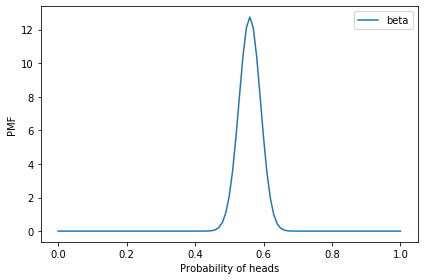

In [25]:
beta.make_pmf().plot(label='beta')
decorate_euro()

Amazing, no?

**Exercise:** One way to construct priors is to make a Beta distribution and adjust the parameters until it has the shape you want.  Then when you do an update, the data get added to the parameters of the prior.  Since the parameters of the prior play the same mathematical role as the data, they are sometimes called "precounts".

Suppose you believe that most coins are fair or unlikely to deviate from 50% by more than a few percentage points.  Construct a prior that captures this belief and update it with the Euro data.  How much effect does it have on the posterior, compared to the uniform prior?

Hint: A Beta distribution with parameters `(1, 1)` is uniform from 0 to 1.

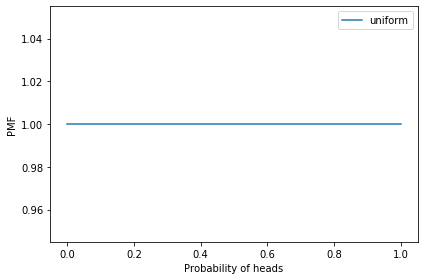

In [26]:
# Solution

# Here's the uniform prior
    
uniform = Beta(1, 1)
uniform.make_pmf().plot(label='uniform')
decorate_euro()

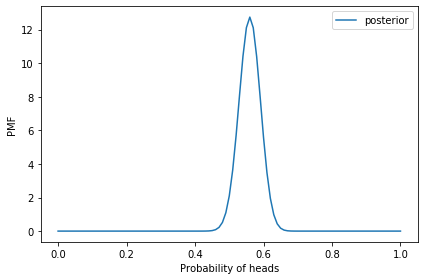

In [27]:
# Solution

# And here's what it looks like after the update
    
uniform.update(data)
uniform.make_pmf().plot(label='posterior')
decorate_euro()

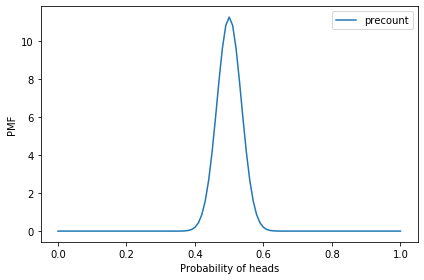

In [28]:
# Solution

# Here's a beta prior with precounts chosen to represent
# background knowledge about coins.
    
beta = Beta(100, 100)
beta.make_pmf().plot(label='precount')
decorate_euro()

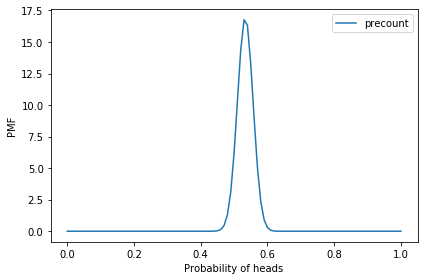

In [29]:
# Solution

# And here's what it looks like after the update
    
beta.update(data)
beta.make_pmf().plot(label='precount')
decorate_euro()

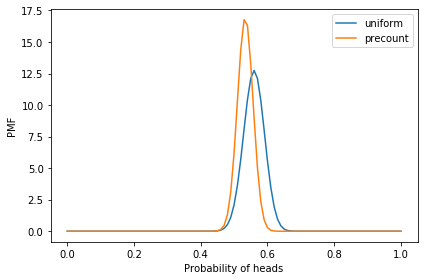

In [30]:
# Solution

# Comparing the two, we see that the informative
# prior influences the location and spread of the
# posterior.
    
uniform.make_pmf().plot(label='uniform')
beta.make_pmf().plot(label='precount')
decorate_euro()

In [31]:
beta.mean()

0.5333333333333333